In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("./registro_utilizzo_giacca.csv")
data

,temperatura,vel_vento,condizione
0,23.7,0.0,no giacca
1,5.3,7.6,giacca
2,19.8,0.0,no giacca
3,18.3,0.0,no giacca
4,12.3,9.0,giacca
...,...,...,...
360,25.3,0.0,no giacca
361,20.3,0.0,no giacca
362,9.2,18.1,giacca
363,14.6,2.7,giacca


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  365 non-null    float64
 1   vel_vento    365 non-null    float64
 2   condizione   365 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [5]:
data.describe()

,temperatura,vel_vento
count,365.000000,365.000000
mean,20.540548,4.107945
std,6.039244,5.696299
min,5.300000,0.000000
25%,16.300000,0.000000
50%,20.400000,0.400000
75%,24.500000,7.000000
max,37.100000,35.800000


In [12]:
# estrazione features e variabile target

X = data[["temperatura","vel_vento"]].values
y = data["condizione"].values

In [14]:
# divisione in train set e test set

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7) # train_size = 70%

In [15]:
albero = tree.DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01)

# max_depth --> server per gestire la massima profondità dell'albero: più l'albero è profondo più 
# vuol dire che impara dettagli, ma se si esagera ce il rischio che i dettagi gli "impari a memoria"

# cpp_alpha --> serve per gestire le biforcazioni, per rendere più o meno un albero complesso

In [16]:
# addestramento

albero.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

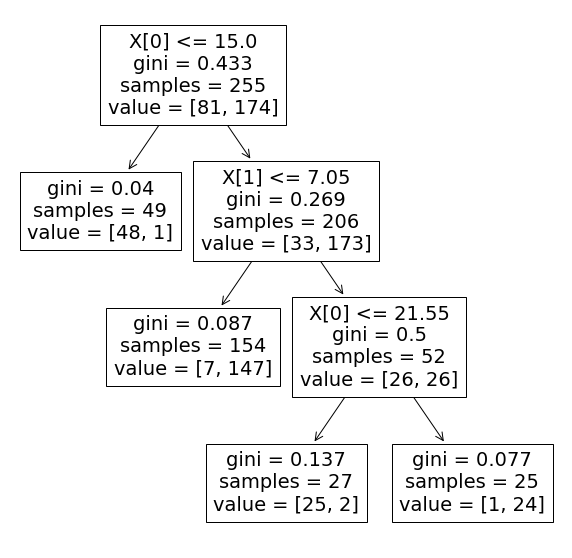

In [19]:
# stampa albero

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(albero)
plt.show()

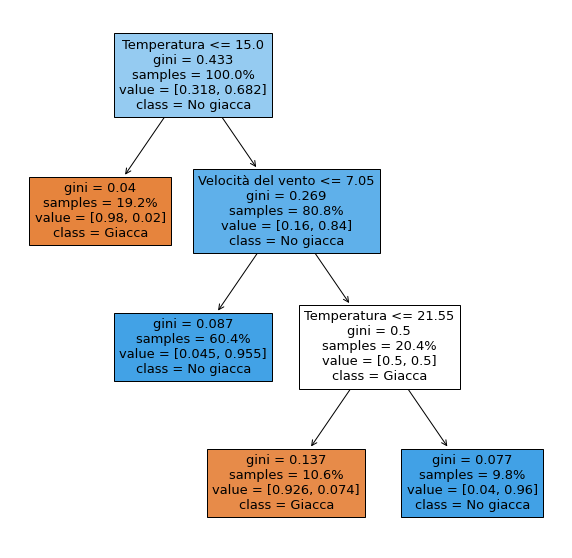

In [20]:
# esistono una serie di parametri per abbellire il risultato

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(albero, feature_names=["Temperatura", "Velocità del vento"], class_names=["Giacca", "No giacca"], label="all", filled=True, proportion=True)
plt.show()

# - label --> attivo le etichette delle informazioni dentro i nodi
# - filled --> coloro i nodi sulla base dell'impurità e della categoria
# - proportion --> mi inidica la proporzione dei casi favorevoli contri i casi contrari dentro ogni 
#                 foglia (anziche il numero di casi assoluti)

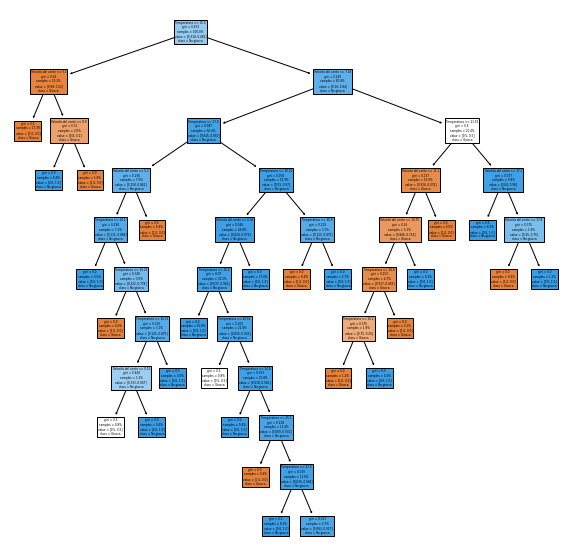

In [22]:
# OVERFITTING

albero = tree.DecisionTreeClassifier(max_depth=10)
albero.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(albero, feature_names=["Temperatura", "Velocità del vento"], class_names=["Giacca", "No giacca"], label="all", filled=True, proportion=True)
plt.show()